```
Student-1
Name: Md. Shanzid hasan
ID# 21-44983-2
```

```
Student-2
Name: Nahar Islam
ID# 21-44971-2
```




*   Mount your google drive.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import all necessary libraries.



In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/heart_attack_risk_dataset.csv')
df = shuffle(df)
print(df)

      Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level  \
3334   27    Male        0                    1                    High   
2455   89  Female        1                    0                     Low   
4555   23    Male        1                    0                     Low   
4882   63  Female        0                    1                Moderate   
92     79  Female        0                    0                    High   
...   ...     ...      ...                  ...                     ...   
1593   29    Male        0                    1                     Low   
4060   63  Female        0                    0                Moderate   
1346   31  Female        0                    0                Moderate   
3454   73  Female        0                    1                Moderate   
3582   46  Female        0                    1                     Low   

        BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
3334  26.74         1        

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 3334 to 3582
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4998 non-null   int64  
 1   Gender                   4998 non-null   object 
 2   Smoking                  4998 non-null   int64  
 3   Alcohol_Consumption      4998 non-null   int64  
 4   Physical_Activity_Level  4998 non-null   object 
 5   BMI                      4998 non-null   float64
 6   Diabetes                 4998 non-null   int64  
 7   Hypertension             4998 non-null   int64  
 8   Cholesterol_Level        4998 non-null   float64
 9   Resting_BP               4998 non-null   int64  
 10  Heart_Rate               4998 non-null   int64  
 11  Family_History           4998 non-null   int64  
 12  Stress_Level             4998 non-null   object 
 13  Chest_Pain_Type          4998 non-null   object 
 14  Thalassemia              4

In [5]:
df.drop_duplicates(inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 3334 to 3582
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4998 non-null   int64  
 1   Gender                   4998 non-null   object 
 2   Smoking                  4998 non-null   int64  
 3   Alcohol_Consumption      4998 non-null   int64  
 4   Physical_Activity_Level  4998 non-null   object 
 5   BMI                      4998 non-null   float64
 6   Diabetes                 4998 non-null   int64  
 7   Hypertension             4998 non-null   int64  
 8   Cholesterol_Level        4998 non-null   float64
 9   Resting_BP               4998 non-null   int64  
 10  Heart_Rate               4998 non-null   int64  
 11  Family_History           4998 non-null   int64  
 12  Stress_Level             4998 non-null   object 
 13  Chest_Pain_Type          4998 non-null   object 
 14  Thalassemia              4

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

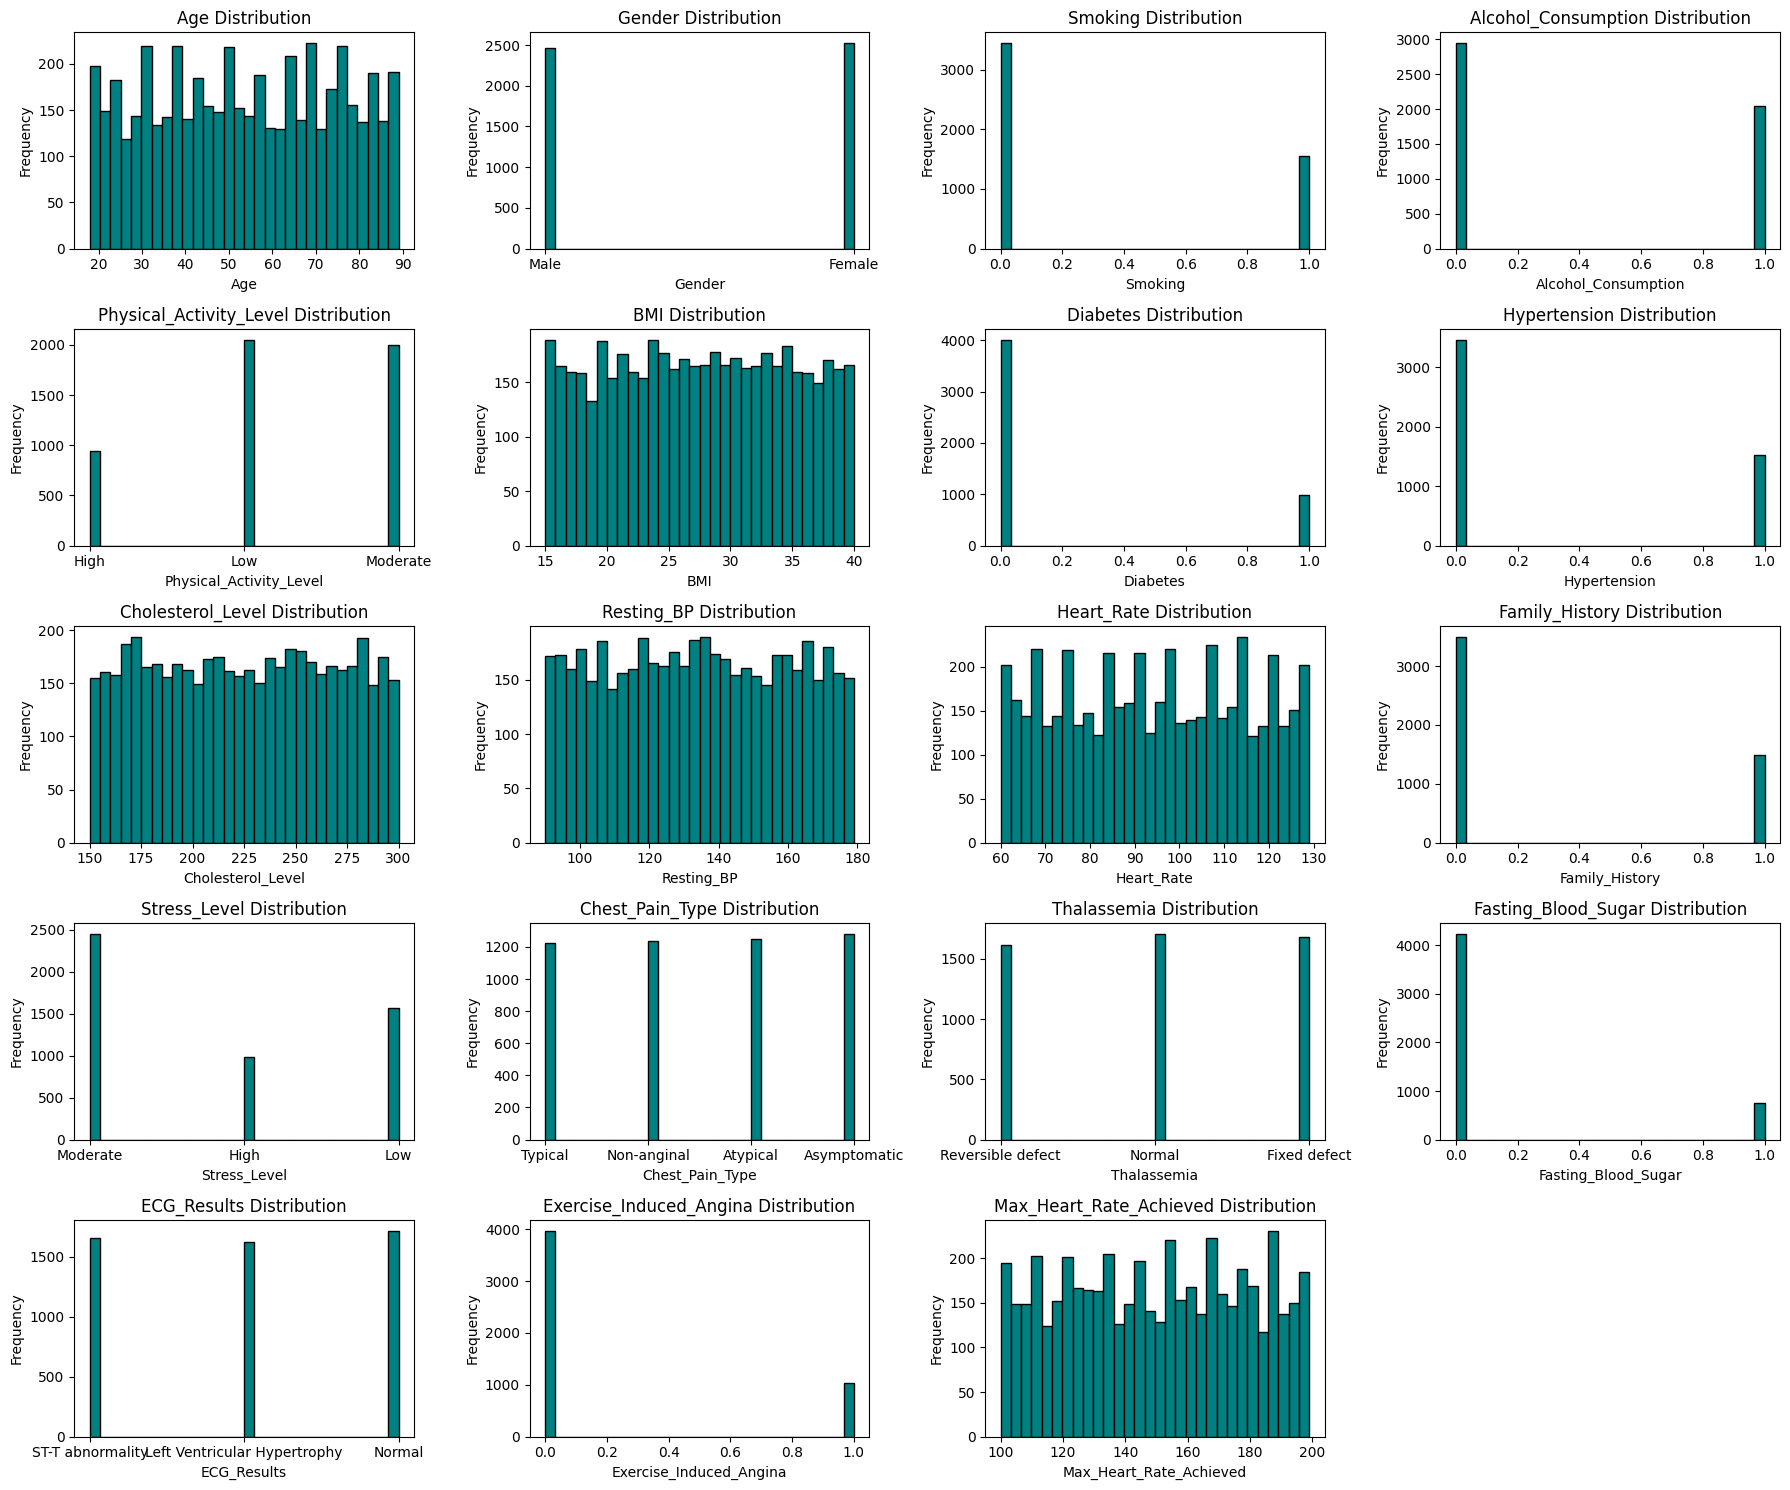

In [6]:
feature_columns = ['Age', 'Gender', 'Smoking', 'Alcohol_Consumption','Physical_Activity_Level','BMI','Diabetes','Hypertension','Cholesterol_Level','Resting_BP','Heart_Rate','Family_History','Stress_Level','Chest_Pain_Type','Thalassemia','Fasting_Blood_Sugar','ECG_Results','Exercise_Induced_Angina','Max_Heart_Rate_Achieved']

plt.figure(figsize=(18, 15))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[column], bins=30, color='teal', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [7]:
categorical_columns = [
    'Gender', 'Physical_Activity_Level', 'Stress_Level',
    'Chest_Pain_Type', 'Thalassemia', 'ECG_Results', 'Heart_Attack_Risk'
]

encoded_values = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[column])
    encoded_values[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    df[column] = encoder.transform(df[column])

for column, mapping in encoded_values.items():
    print(f'{column}: {mapping}')
print(df.head())

Gender: {'Female': 0, 'Male': 1}
Physical_Activity_Level: {'High': 0, 'Low': 1, 'Moderate': 2}
Stress_Level: {'High': 0, 'Low': 1, 'Moderate': 2}
Chest_Pain_Type: {'Asymptomatic': 0, 'Atypical': 1, 'Non-anginal': 2, 'Typical': 3}
Thalassemia: {'Fixed defect': 0, 'Normal': 1, 'Reversible defect': 2}
ECG_Results: {'Left Ventricular Hypertrophy': 0, 'Normal': 1, 'ST-T abnormality': 2}
Heart_Attack_Risk: {'High': 0, 'Low': 1, 'Moderate': 2}
      Age  Gender  Smoking  Alcohol_Consumption  Physical_Activity_Level  \
3334   27       1        0                    1                        0   
2455   89       0        1                    0                        1   
4555   23       1        1                    0                        1   
4882   63       0        0                    1                        2   
92     79       0        0                    0                        0   

        BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
3334  26.74         1           

In [8]:
x = df[feature_columns]
y = df['Heart_Attack_Risk']

print(x.shape)
print(y.shape)

(4998, 19)
(4998,)


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3241)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3998, 19)
(1000, 19)
(3998,)
(1000,)


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [13]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
y_pred_train = svm_classifier.predict(x_train)
y_pred_test = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the SVM model: {accuracy:.4f}')

Accuracy of the SVM model: 0.3669


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

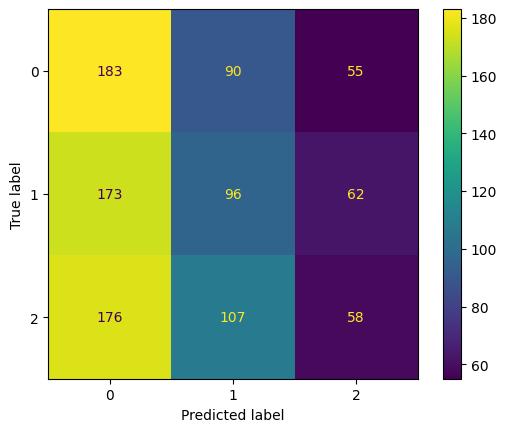

In [14]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [15]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.3669
Testing Accuracy: 0.3370
